In [1]:
"""
My project worked on the dataset “AusApparalSales4thQrt2020.csv” obtained from the MS AI – Applied Data Science with Python program with 
Simplilearn. I received permission to work on this data and to upload the Python code and results to my GitHub account. The goal of this analysis 
is to show my Python coding skills with results using real sales data. 

"""

In [ ]:
"""
Project Objective:

The goal of this project is to analyze AAL’s fourth-quarter apparel sales dataset in various states in Australia. The work reflects data 
preparation, statistical analysis, visualization, and report production to open sales trends by state, date, group, time of day, and unit. 
This analysis will encourage the sales and marketing team to find top- level markets that demand goal-oriented strategies, and decision-making 
power for future business growth. 

"""

To hold a data scientist position, I need to follow the following steps.
*  Data cleaning
*  Data analysis
*  Data visualization


## Step 1: Data Cleaning

In [77]:
# Load pandas library
import pandas as pd

# Read the dataset
df = pd.read_csv("AusApparalSales4thQrt2020.csv")
print(df.head())

       Date        Time State     Group  Unit  Sales
0  1-Oct-20     Morning    WA      Kids     8  20000
1  1-Oct-20     Morning    WA       Men     8  20000
2  1-Oct-20     Morning    WA     Women     4  10000
3  1-Oct-20     Morning    WA   Seniors    15  37500
4  1-Oct-20   Afternoon    WA      Kids     3   7500


#### Find any missing data 

In [79]:
# Find total number of missing values as NaN in each column.
print("Missing values in each column:\n", df.isna().sum())

Missing values in each column:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [81]:
# Find total number of non-missing values as not NaN in each column. 
print("total number of non-missing values in each column:\n", df.notna().sum())

total number of non-missing values in each column:
 Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [83]:
# Find total number of repeating rows
print("total number of duplicated rows:\n", df.duplicated().sum())

total number of duplicated rows:
 0


In [85]:
# Find numbers of rows, and columns including data types, memory usage, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


Based on my knowledge of data analytics, I can provide 4 recommendations for dealing with missing data
1.	We can fill missing data with their mean or median values if they are numerical values.
2.	We can fill missing data with their mode values if they are found in categorical columns. 
3.	We can drop missing rows if many nulls are found. 
4.	Data cleaning is not necessary if missing values are not found. 


In [ ]:
""" 
Need data normalization:

Why: Sales and units’ columns in dataset are not the same units. Normalization is used for rescaling these columns to make the same range (0 to 1). 

"""
 

In [88]:

# Choose a list of  numerical featurres from the dataset for normalization. There are 2 numerical featurers.  
two_num_features = ["Unit", "Sales"]

# Fit 2 numerical featurers into 0 to 1 scale 

# Load minimum maximum scaler (MinMaxScaler) from sklear used to change some featurers into the range of 0 and 1.
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler()
min_max_scaler = MinMaxScaler()

# Make a copy of the raw dataset and work on it for normalization. 
# Do not overwrite the original values in the two featurers, ["Unit", "Sales"], as we need them later for analysis.
df_two_featurers_normalized = df.copy()

# Use min_max_scaler on the two_num_features. It updates the df_two_featurers_normalized with normalized values between 0 and 1. 
df_two_featurers_normalized[two_num_features] = min_max_scaler.fit_transform(df[two_num_features])


# Print upto the first 5 rows of the updated dataset with the normalized columns ("Unit", and "Sales"
print("\n ---Normalized dataset:\n", df_two_featurers_normalized.head())



 ---Normalized dataset:
        Date        Time State     Group      Unit     Sales
0  1-Oct-20     Morning    WA      Kids  0.095238  0.095238
1  1-Oct-20     Morning    WA       Men  0.095238  0.095238
2  1-Oct-20     Morning    WA     Women  0.031746  0.031746
3  1-Oct-20     Morning    WA   Seniors  0.206349  0.206349
4  1-Oct-20   Afternoon    WA      Kids  0.015873  0.015873


#### Use the GroupBy() function to either chunk or merge the dataset

In [90]:
# Use "groupby" function to group the raw data by "State" and then choose the "Sales" column. 
sales_state_group = df.groupby("State")["Sales"]

# Find the sum of sales in each state. 
total_sales_state_group = sales_state_group.sum()


# print the total sales in each state
print("\ntotal sales in each state:\n", total_sales_state_group)


total sales in each state:
 State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64


In [92]:
# Look at the total sales in each group.

sales_group = df.groupby("Group")["Sales"]

total_sales_group = sales_group.sum()

print("\ntotal_sales_group:\n", total_sales_group)


total_sales_group:
 Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64


In [94]:
# Look at the total sales in each time.

sales_time = df.groupby("Time")["Sales"]

total_sales_time = sales_time.sum()

print("\nTotal sales in each time:\n", total_sales_time )


Total sales in each time:
 Time
Afternoon    114007500
Evening      112087500
Morning      114207500
Name: Sales, dtype: int64


In [96]:
# Total sales with grouping both "State", and "group"

sales_state_group = df.groupby(["State", "Group"])["Sales"]

total_sales_state_group  = sales_state_group .sum()

# print the total sales with grouping by State, and group
print("\nTotal sales with grouping State, and group:\n", total_sales_state_group)


Total sales with grouping State, and group:
 State  Group  
NSW    Kids       18587500
       Men        19022500
       Seniors    18187500
       Women      19172500
NT     Kids        5700000
       Men         5762500
       Seniors     5465000
       Women       5652500
QLD    Kids        8510000
       Men         8392500
       Seniors     8190000
       Women       8325000
SA     Kids       14515000
       Men        14655000
       Seniors    14717500
       Women      14970000
TAS    Kids        5775000
       Men         5757500
       Seniors     5650000
       Women       5577500
VIC    Kids       26360000
       Men        26407500
       Seniors    26315000
       Women      26482500
WA     Kids        5625000
       Men         5752500
       Seniors     5512500
       Women       5262500
Name: Sales, dtype: int64


In [ ]:
""" Application of the groupby() function: 

My recommendation for this project is to group with “State” and “Group” to customer interest in each region. This analysis supports businesses 
for marketing in each region as well as focusing on certain types of customers. Grouping with “Time” is also useful to focus sales on peak time. """


## Step 2: Data Analysis

In [ ]:
"""
Descriptive Statistical Analysis of the “Sales” and “Unit” Columns in the dataset using different techniques (Mean, Median, Mode, Standard Deviation)

Goal:
The objective of this analysis is to understand how the values in the “Unit” and “Sales” features vary. By analyzing mean, median, mode, and 
standard deviation, businesses can understand customers’ choices. Businesses can take the next step for effective marketing policies and plans
that support market needs.

"""

In [100]:
# Look at the mean values

# Choose the "Unit", "Sales" columns from the "df" dataset
Unit_Sales =  df[["Unit", "Sales"]]
print(Unit_Sales.head())


# Find the mean of the "Unit", "Sales" columns
print("\nMean Values of Unit and Sales columns:\n", Unit_Sales.mean())


   Unit  Sales
0     8  20000
1     8  20000
2     4  10000
3    15  37500
4     3   7500

Mean Values of Unit and Sales columns:
 Unit        18.005423
Sales    45013.558201
dtype: float64


In [104]:
# Look at the Median values

# Find the median of the "Unit", "Sales" columns
print("\nMedian Values of Unit and Sales columns:\n", Unit_Sales.median())


Median Values of Unit and Sales columns:
 Unit        14.0
Sales    35000.0
dtype: float64


In [106]:
# Look at the mode values

# Find the mode of the "Unit", "Sales" columns
print("\nMode Values of Unit and Sales:\n", Unit_Sales.mode())



Mode Values of Unit and Sales:
    Unit  Sales
0     9  22500


In [108]:
# Look at the Standard deviation values

# Find the Standard deviation of the "Unit", "Sales" columns. 
print("Standard deviation Values of Unit and Sales:\n", df[["Unit", "Sales"]].std())

Standard deviation Values of Unit and Sales:
 Unit        12.901403
Sales    32253.506944
dtype: float64


In [110]:
""" Analysis of the “Groups” with the highest and lowest Sales"""


# Use "groupby" function to group the raw data by "Group" and then choose the "Sales" column.
groupby_group_sales = df.groupby("Group")["Sales"]

# Find the sum of sales in each group.
groupby_group_sales_sum = groupby_group_sales.sum()

# Set ascending order through group for the total sales 
groupby_group_sales_sum_sv = groupby_group_sales_sum.sort_values(ascending = True)

# print the total Sales in each Group
print("\nTotal sales for each Group:\n", groupby_group_sales_sum_sv)

# Look at the group with the highest sales.
print("\nGroup with the highest Sales:\n", groupby_group_sales_sum_sv.idxmax())

# Look at the group with the lowest sales.
print("\nGroup with the lowest Sales:\n", groupby_group_sales_sum_sv.idxmin()) 


Total sales for each Group:
 Group
Seniors    84037500
Kids       85072500
Women      85442500
Men        85750000
Name: Sales, dtype: int64

Group with the highest Sales:
  Men

Group with the lowest Sales:
  Seniors


In [112]:
""" Analysis of the “State” with the highest and lowest Sales"""

groupby_state_sales = df.groupby("State")["Sales"]

groupby_state_sales_sum = groupby_state_sales.sum()

groupby_state_sales_sum_sv = groupby_state_sales_sum.sort_values(ascending = True)

print("\nTotal Sales in each State:\n", groupby_state_sales_sum_sv)

print("\nhighest Sales State :\n", groupby_state_sales_sum_sv.idxmax())

print("\nlowest Sales State:\n", groupby_state_sales_sum_sv.idxmin()) 


Total Sales in each State:
 State
WA      22152500
NT      22580000
TAS     22760000
QLD     33417500
SA      58857500
NSW     74970000
VIC    105565000
Name: Sales, dtype: int64

highest Sales State :
  VIC

lowest Sales State:
  WA


In [35]:
"""
Present analysis results using weekly, monthly, and quarterly reports

"""

'\nPresent analysis results using weekly, monthly, and quarterly reports\n\n'

#### Present weekly reports

In [114]:
# Cange the "Date" column into the panda date column. 
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")

# print the first 5 rows of the updated "Date" column from the original dataset
print(df["Date"].head())

# print the first five rows of the updated dataset
print(df.head())

0   2020-10-01
1   2020-10-01
2   2020-10-01
3   2020-10-01
4   2020-10-01
Name: Date, dtype: datetime64[ns]
        Date        Time State     Group  Unit  Sales
0 2020-10-01     Morning    WA      Kids     8  20000
1 2020-10-01     Morning    WA       Men     8  20000
2 2020-10-01     Morning    WA     Women     4  10000
3 2020-10-01     Morning    WA   Seniors    15  37500
4 2020-10-01   Afternoon    WA      Kids     3   7500


In [116]:
# Find the week number from the "Date" featurer
df["Week"] = df["Date"].dt.isocalendar().week           # new column  = df["Week"]

# print the new column named as "Week".
print(df["Week"])

# print the updated dataset
print(df)

0       40
1       40
2       40
3       40
4       40
        ..
7555    53
7556    53
7557    53
7558    53
7559    53
Name: Week, Length: 7560, dtype: UInt32
           Date        Time State     Group  Unit  Sales  Week
0    2020-10-01     Morning    WA      Kids     8  20000    40
1    2020-10-01     Morning    WA       Men     8  20000    40
2    2020-10-01     Morning    WA     Women     4  10000    40
3    2020-10-01     Morning    WA   Seniors    15  37500    40
4    2020-10-01   Afternoon    WA      Kids     3   7500    40
...         ...         ...   ...       ...   ...    ...   ...
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000    53
7556 2020-12-30     Evening   TAS      Kids    15  37500    53
7557 2020-12-30     Evening   TAS       Men    15  37500    53
7558 2020-12-30     Evening   TAS     Women    11  27500    53
7559 2020-12-30     Evening   TAS   Seniors    13  32500    53

[7560 rows x 7 columns]


In [118]:
# Find the Total sales in each week. 
sales_each_week = df.groupby("Week")["Sales"].sum()

# total sales in each week
print("\nEach week sales:\n", sales_each_week)


Each week sales:
 Week
40    15045000
41    27002500
42    26640000
43    26815000
44    21807500
45    20865000
46    21172500
47    21112500
48    21477500
49    29622500
50    31525000
51    31655000
52    31770000
53    13792500
Name: Sales, dtype: int64


#### Present monthly reports

In [120]:
# Make a month column from the "Date" featurer. 

df["Month"] = df["Date"].dt.month_name()  #  new column in the dataset (df)

# Updated dataset including the Month column. 
print(df)


           Date        Time State     Group  Unit  Sales  Week     Month
0    2020-10-01     Morning    WA      Kids     8  20000    40   October
1    2020-10-01     Morning    WA       Men     8  20000    40   October
2    2020-10-01     Morning    WA     Women     4  10000    40   October
3    2020-10-01     Morning    WA   Seniors    15  37500    40   October
4    2020-10-01   Afternoon    WA      Kids     3   7500    40   October
...         ...         ...   ...       ...   ...    ...   ...       ...
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000    53  December
7556 2020-12-30     Evening   TAS      Kids    15  37500    53  December
7557 2020-12-30     Evening   TAS       Men    15  37500    53  December
7558 2020-12-30     Evening   TAS     Women    11  27500    53  December
7559 2020-12-30     Evening   TAS   Seniors    13  32500    53  December

[7560 rows x 8 columns]


In [122]:
# Find the Total sales in each month.

month_groupby = df.groupby("Month")

monthly_report_sales = month_groupby["Sales"]

monthly_report_sales_sum = monthly_report_sales.sum()

print("\nMonthly sales report:\n", monthly_report_sales_sum)



Monthly sales report:
 Month
December    135330000
November     90682500
October     114290000
Name: Sales, dtype: int64


#### Present quarterly reports

In [124]:
# Make the Quarter column from the "Date" feature
df["Quarter"] = df["Date"].dt.quarter

print(df)

           Date        Time State     Group  Unit  Sales  Week     Month  \
0    2020-10-01     Morning    WA      Kids     8  20000    40   October   
1    2020-10-01     Morning    WA       Men     8  20000    40   October   
2    2020-10-01     Morning    WA     Women     4  10000    40   October   
3    2020-10-01     Morning    WA   Seniors    15  37500    40   October   
4    2020-10-01   Afternoon    WA      Kids     3   7500    40   October   
...         ...         ...   ...       ...   ...    ...   ...       ...   
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000    53  December   
7556 2020-12-30     Evening   TAS      Kids    15  37500    53  December   
7557 2020-12-30     Evening   TAS       Men    15  37500    53  December   
7558 2020-12-30     Evening   TAS     Women    11  27500    53  December   
7559 2020-12-30     Evening   TAS   Seniors    13  32500    53  December   

      Quarter  
0           4  
1           4  
2           4  
3           4  
4      

In [126]:
# Find the total sales in the quarter.

Quarter_groupby = df.groupby("Quarter")

Quarter_report_sales = Quarter_groupby["Sales"]

Quarter_report_sales_sum = Quarter_report_sales.sum()

print("\nQuarter sales report:\n", Quarter_report_sales_sum)




Quarter sales report:
 Quarter
4    340302500
Name: Sales, dtype: int64


## Step 3. Data visualization

3-1(a): State-wise sales analysis for different demographic groups (kids, women, men, and seniors).

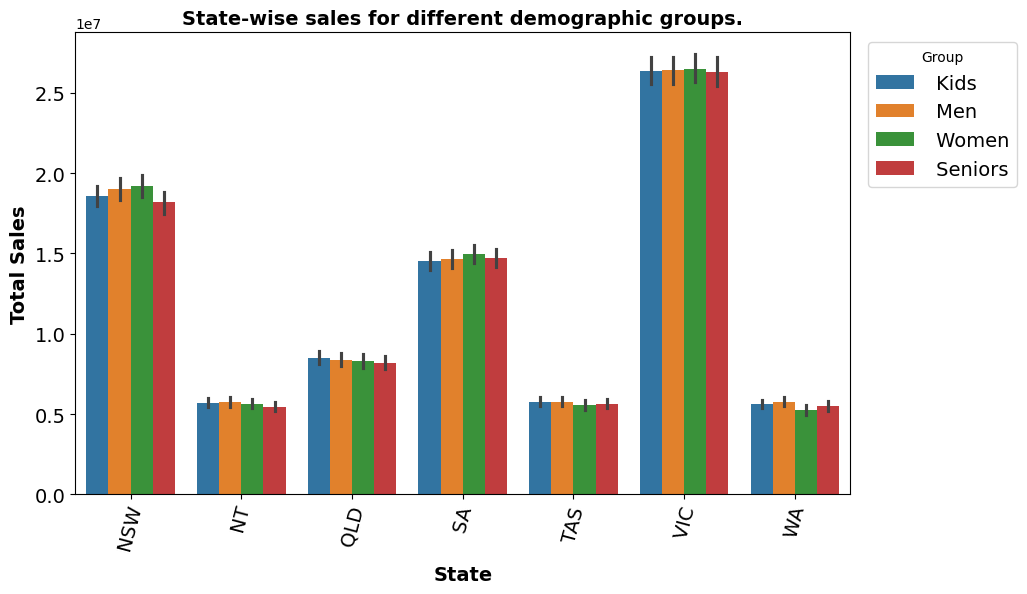

In [128]:

# Load the library (matplotlib.pyplot)
import matplotlib.pyplot as plt

# Load the library (seaborn )
import seaborn as sns


# Make a figure with size (width = 10 inches, height = 6 inches)
plt.figure(figsize=(10,6))

# Generate a bar plot using "seaborn" with key parameters
sns.barplot(data = df, x = "State", y = "Sales", hue = "Group", order = sorted(df["State"].unique()) ,estimator = sum)

# Put a title on the bar plot
plt.title("State-wise sales for different demographic groups.", fontsize = 14,  loc = "center", weight = "bold")

# put label on the x-axis
plt.xlabel("State", fontsize = 14, weight = "bold")

# put label on the y-axis
plt.ylabel("Total Sales", fontsize = 14, weight = "bold")


# x-axis labels rotation by 75 degrees
plt.xticks(rotation = 75, fontsize = 14)

plt.yticks(fontsize = 14)


# put a legend for demographic groups (kids, women, men, and seniors).
plt.legend(title="Group", fontsize = 14, bbox_to_anchor=(1.01, 1), loc = "upper left")

plt.show()


3-1b. Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.

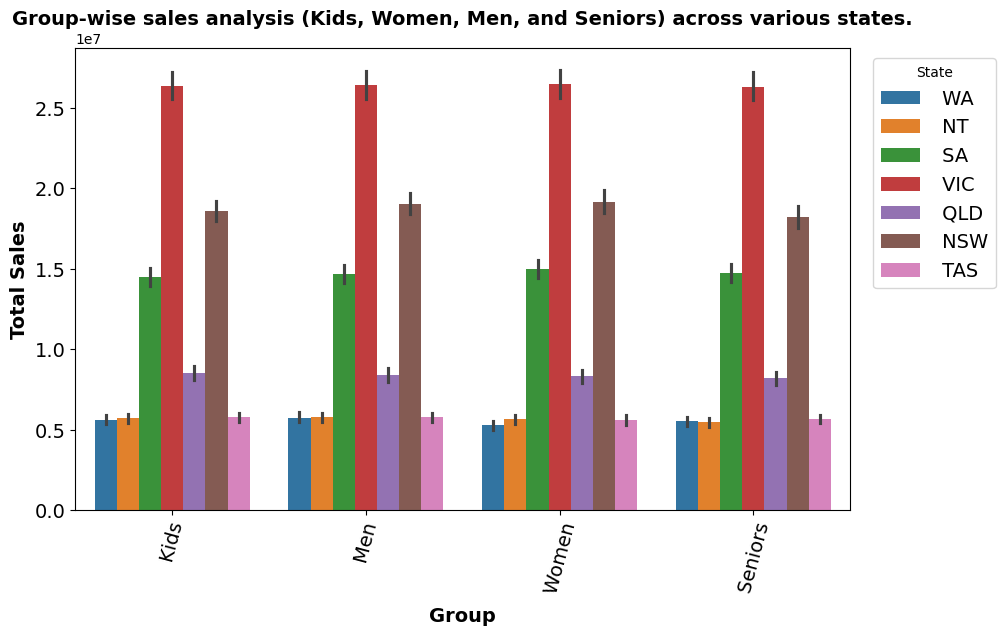

In [130]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = "Group", y = "Sales", hue = "State" ,estimator = sum)
plt.title("Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.", fontsize = 14,  loc = "center", weight = "bold")
plt.xlabel("Group", fontsize = 14, weight = "bold")
plt.ylabel("Total Sales", fontsize = 14, weight = "bold")
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(title="State", fontsize = 14, bbox_to_anchor=(1.2, 1), loc = "upper right")
plt.show()


3-1(c) Time-of-the-day analysis: Find peak and off-peak sales periods

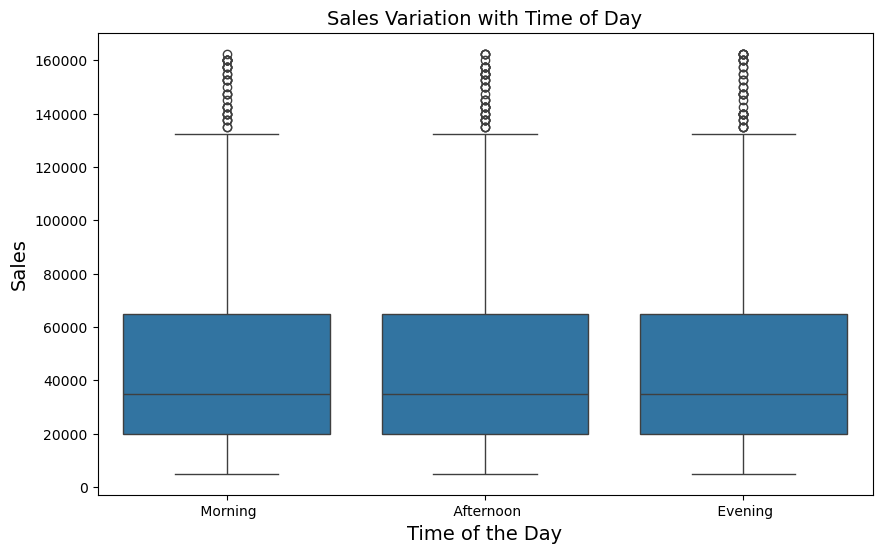

In [132]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Time", y="Sales")
plt.title("Sales Variation with Time of Day", fontsize = 14,  loc = "center")
plt.xlabel("Time of the Day", fontsize = 14)
plt.ylabel("Sales", fontsize = 14)
plt.show()

3-2: Dashboard for daily, weekly, monthly, and quarterly charts.

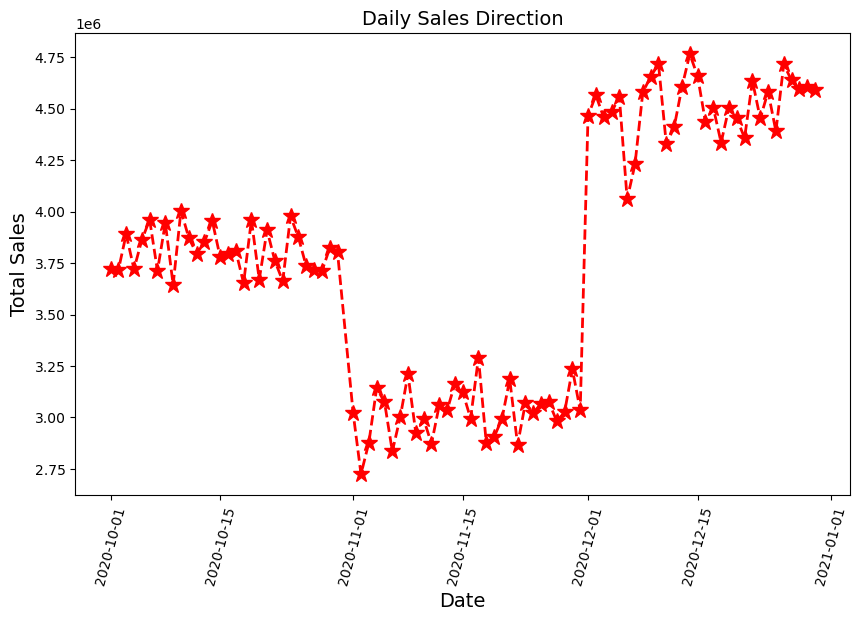

In [134]:
# Daily Sales Direction

plt.figure(figsize=(10,6))
Daily_Sales_Direction = df.groupby("Date")["Sales"].sum().reset_index()
plt.plot(Daily_Sales_Direction["Date"], Daily_Sales_Direction["Sales"], color = "red", linewidth = 2, linestyle = "--", marker='*', markersize = 12)
plt.title("Daily Sales Direction", fontsize = 14,  loc = "center")
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Total Sales", fontsize = 14)
plt.xticks(rotation = 75)
plt.show()

          Date        Time    Sales
0   2020-10-01   Afternoon  1212500
1   2020-10-01     Evening  1282500
2   2020-10-01     Morning  1225000
3   2020-10-02   Afternoon  1275000
4   2020-10-02     Evening  1162500
..         ...         ...      ...
265 2020-12-29     Evening  1487500
266 2020-12-29     Morning  1620000
267 2020-12-30   Afternoon  1507500
268 2020-12-30     Evening  1475000
269 2020-12-30     Morning  1607500

[270 rows x 3 columns]


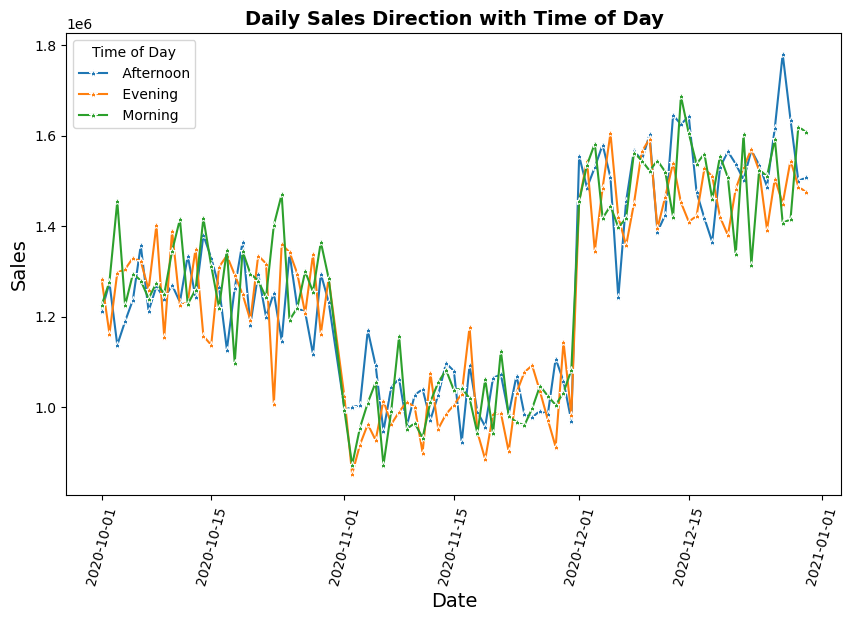

In [63]:
# Plot sales data with date and time of the day ("Morning", "Afternoon, "Evening")

# Sum sales data
total_sales_time = df.groupby(["Date", "Time"], as_index=False)["Sales"].sum()
print(total_sales_time)

plt.figure(figsize=(10,6))
sns.lineplot(data=total_sales_time, x="Date", y="Sales", hue="Time", marker="*")
plt.title("Daily Sales Direction with Time of Day", fontsize=14, weight="bold")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.legend(title="Time of Day")
plt.xticks(rotation=75)
plt.show()


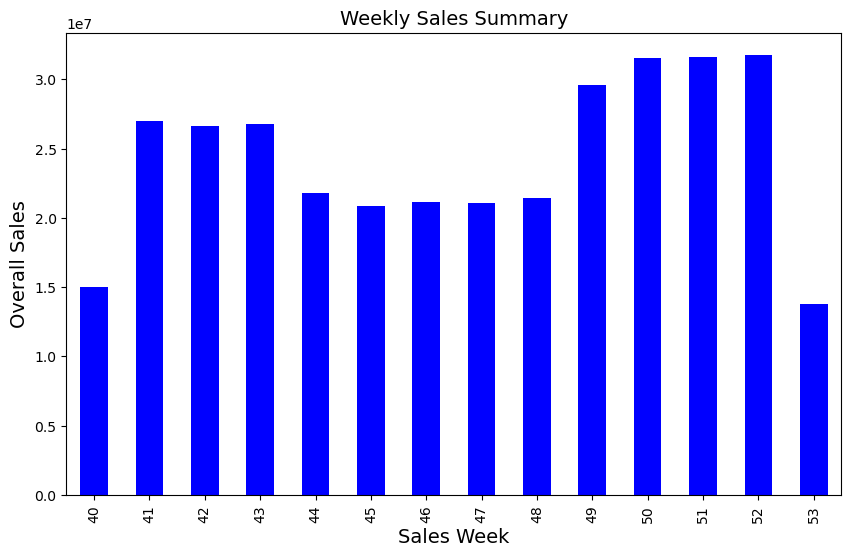

In [136]:
# Weekly sales Direction

plt.figure(figsize=(10,6))

df_sum = df.groupby("Week")["Sales"].sum()
df_sum.plot(kind="bar", color = "blue")

plt.title("Weekly Sales Summary", fontsize = 14,  loc = "center")
plt.xlabel("Sales Week", fontsize = 14)
plt.ylabel("Overall Sales", fontsize = 14)
plt.show()


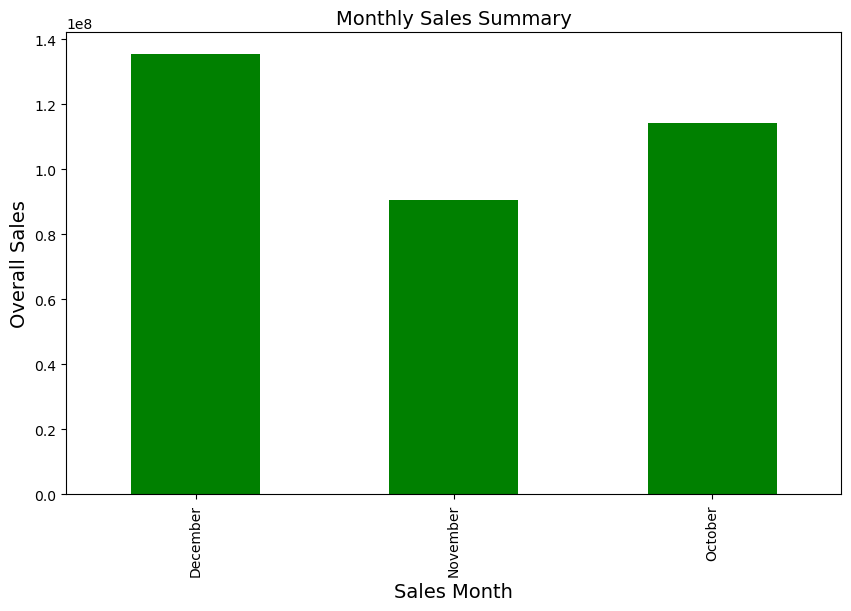

In [138]:
# Monthly sales Direction
plt.figure(figsize=(10,6))

df_sum_month = df.groupby("Month")["Sales"].sum()
df_sum_month.plot(kind="bar", color = "green")

plt.title("Monthly Sales Summary", fontsize = 14,  loc = "center")
plt.xlabel("Sales Month", fontsize = 14)
plt.ylabel("Overall Sales", fontsize = 14)
plt.show()



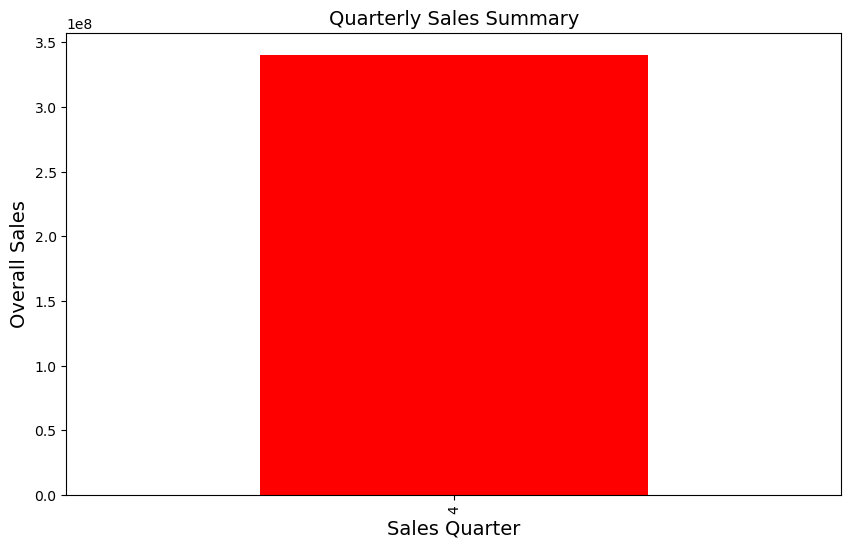

In [140]:
# Quarterly sales Direction
plt.figure(figsize=(10,6))

df_sum_quarter = df.groupby("Quarter")["Sales"].sum()
df_sum_quarter.plot(kind="bar", color = "red")

plt.title("Quarterly Sales Summary", fontsize = 14,  loc = "center")
plt.xlabel("Sales Quarter", fontsize = 14)
plt.ylabel("Overall Sales", fontsize = 14)
plt.show()



In [107]:
""" My recommendation for data visualization packages: 

In this project, I recommend using both “Seaborn” and “Matplotlib” packages for data visualization. Seaborn gives powerful functions for
generating statistical graphics such as bar plots, and box plots for the sales data analysis. Matplotlib gives different parameters used to
clearly control the visual elements for bar plot in the sales data analysis under weekly/monthly/quarterly or daily sales data. These packages 
provide a clear visualization picture for taking decisions on sales and marketing. 

"""

' My recommendation for data visualization packages: \n\nIn this project, I recommend using both “Seaborn” and “Matplotlib” packages for data visualization. Seaborn gives powerful functions for\ngenerating statistical graphics such as bar plots, and box plots for the sales data analysis. Matplotlib gives different parameters used to\nclearly control the visual elements for bar plot in the sales data analysis under weekly/monthly/quarterly or daily sales data. These packages \nprovide a clear visualization picture for taking decisions on sales and marketing. \n\n'

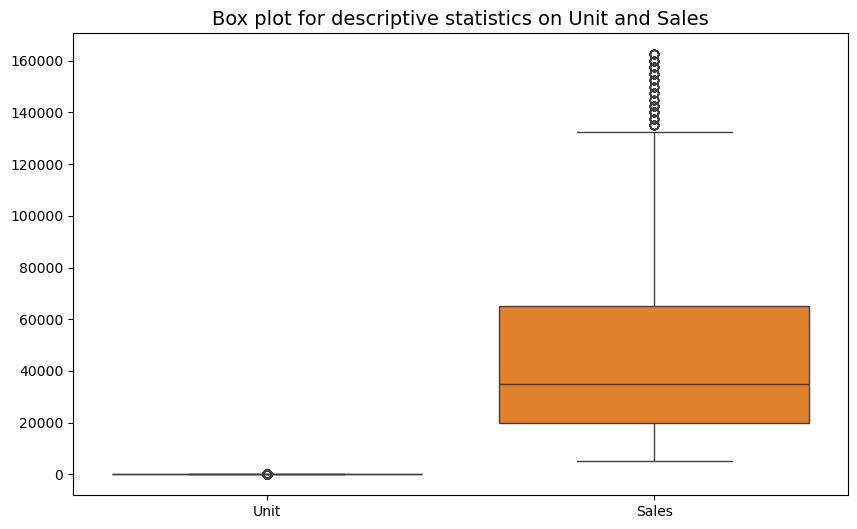

In [142]:
# 4-1 Use box plot for descriptive statistics on Unit and Sales

plt.figure(figsize=(10,6))
sns.boxplot(data=df[["Unit", "Sales"]])
plt.title("Box plot for descriptive statistics on Unit and Sales", fontsize = 14,  loc = "center")
plt.show()

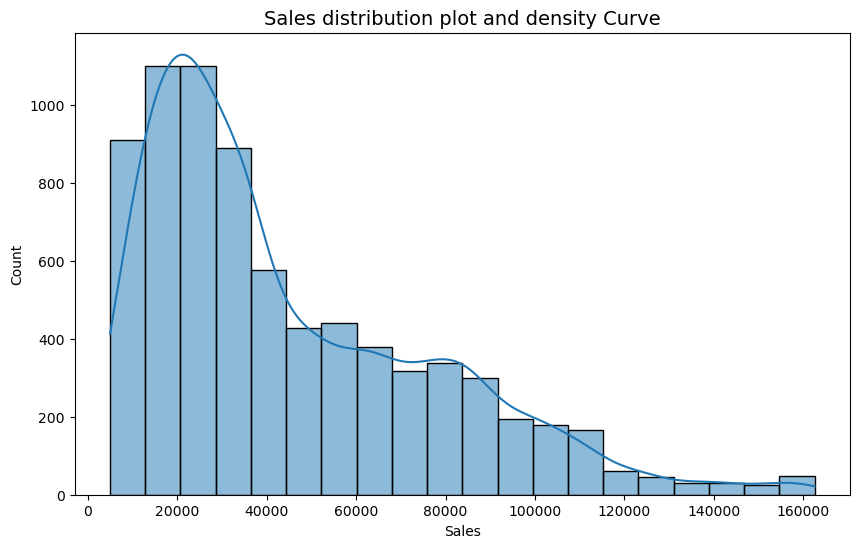

In [144]:
# Sales distribution plot
plt.figure(figsize=(10,6))
sns.histplot(df["Sales"], kde=True, bins=20)
plt.title("Sales distribution plot and density Curve", fontsize = 14,  loc = "center")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

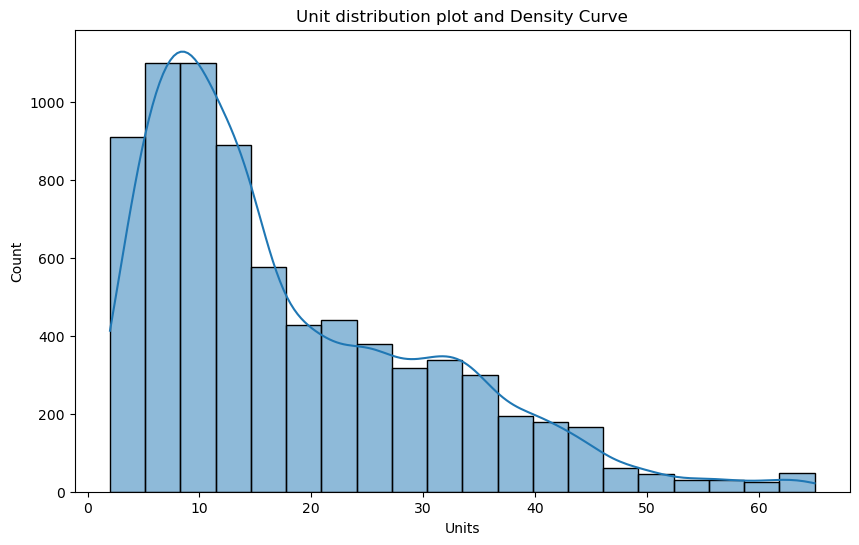

In [146]:
# Units distribution plot
plt.figure(figsize=(10,6))
sns.histplot(df["Unit"], kde=True, bins=20)
plt.title("Unit distribution plot and Density Curve")
plt.xlabel("Units")
plt.ylabel("Count")
plt.show()

In [158]:
"""
Project Conclusion:

The sales analysis of AAL’s fourth-quarter 2020 data showed encouraging results for key decision-making. State-wise analysis showed the top revenue
generating regions and identified low performing states that needs goal oriented sales programs. Group-wise analysis reflected significant
differences in role through demographic groups (kids, women, men, and seniors). On the other hand, time of day trend showed peak and off peak 
sales periods that can be used for promotional steps. Statistical analysis and visualizations supported a deeper understanding of sales 
distribution and variability. Overall, this data analysis approach provides recommendations for the sales and marketing team to increase revenues,
improve regional performance and optimize customer focused strategies in the coming year.
.
"""

'\nProject Conclusion:\nThe sales analysis of AAL’s fourth-quarter 2020 apparel data revealed valuable insights for strategic decision-making. State-wise evaluation \nhighlighted the top revenue-generating regions and identified underperforming states that require targeted sales programs. Group-wise analysis\nshowed clear differences in contribution across demographic segments, while time-of-day patterns revealed peak and off-peak sales periods that \ncan be leveraged for promotional strategies. Statistical measures and visualizations provided a deeper understanding of sales distribution and \nvariability. Overall, this data-driven approach equips the Sales and Marketing team with actionable recommendations to boost revenues, improve\nregional performance, and optimize customer engagement strategies in the coming year.\n\n'